<p style="font-family: 'Amiri', serif; font-size: 3rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: grey; padding: 10px; border-radius: 10px; border: 7px solid cyan; width: 95%;">
  <span style="font-weight: bold; color: blue; animation: pulse 2s infinite;">📉Thanks </span>
  <span style="font-style: italic; color: #2ca02c; animation: pulse 2s infinite;"> for visiting my notebook If you feel my notebook helpful, support with one upvote, thank you 📊</span> 
</p>


 <center><img src='https://media.tenor.com/3MeBy_APrKYAAAAi/dudu-car-dudu-running.gif' 
     height=200px width=250px /></center>

<div style="background: linear-gradient(45deg, #ff8a00, #e52e71); padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.5); text-align: center; background-color: orange; color: white;">
    <h1 style="font-family: Algerian; font-size: 32px;">IMPORTING LIBRARIES  </h1>
</div>


In [1]:
#Import the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import HTML, display
from warnings import filterwarnings
filterwarnings('ignore')

<div style="background: linear-gradient(45deg, #ff8a00, #e52e71); padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.5); text-align: center; background-color: orange; color: white;">
    <h1 style="font-family: Algerian; font-size: 32px;">ABOUT THE  DATA  📈</h1>
</div>




This dataset contains detailed information about **550 car models**, focusing on essential **performance metrics and specifications**. It is particularly useful for analyzing **fuel efficiency, engine configurations, and vehicle classifications** across different **manufacturers and years**. With a broad range of features, it serves as a valuable resource for **machine learning, data exploration, and automotive research**.

## Key Features:

- **`city_mpg`**: Fuel efficiency in miles per gallon (mpg) for city driving, crucial for urban driving analysis.
- **`highway_mpg`**: Fuel efficiency in mpg for highway driving, ideal for comparing long-distance performance.
- **`combination_mpg`**: The combined fuel efficiency for both city and highway driving, a critical metric for overall vehicle performance.
- **`cylinders` & `displacement`**: Engine specifications that help understand a car's power and fuel consumption.
- **`drive`**: The type of drivetrain (e.g., FWD, AWD), key for determining the car's handling and terrain suitability.
- **`fuel_type`**: The type of fuel (e.g., gasoline, electric), important for environmental impact studies.
- **`make` & `model`**: Car manufacturer and model, enabling brand-specific analysis and comparison.
- **`year`**: The production year of the vehicle, useful for tracking trends and technological improvements over time.


In [2]:
df = pd.read_csv("/kaggle/input/explore-car-performance-fuel-efficiency-data/car_data.csv")

In [3]:
df.sample(5)

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
59,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2015
203,24,subcompact car,27,4.0,2.0,awd,gas,33,audi,a5 quattro,m,2018
140,16,subcompact car,19,6.0,3.8,awd,gas,22,nissan,gt-r,a,2016
304,30,compact car,33,4.0,1.8,fwd,gas,38,toyota,corolla,a,2020
512,27,small sport utility vehicle,29,4.0,2.0,awd,gas,31,kia,seltos awd,a,2024





 <center><img src='https://media1.tenor.com/m/mnRuL_4d87UAAAAC/36-racing.gif' 
     height=200px width=250px /></center>


In [4]:
num_records = len(df)
num_records

550

In [5]:
num_columns = len(df.columns)
num_columns

12

<div style="background: linear-gradient(45deg, #ff8a00, #e52e71); padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.5); text-align: center; background-color: orange; color: white;">
    <h1 style="font-family: Algerian; font-size: 32px;">📉 CHECK ON  DATA  📈</h1>
</div>



In [6]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['Duplicate'] = df.duplicated().sum()
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['avg'] = desc['mean'].values
    summ['std dev'] = desc['std'].values
    summ['top value'] = desc['top'].values
    summ['Freq'] = desc['freq'].values

    return summ

In [7]:
summary(df).style.background_gradient()

,data type,#missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
city_mpg,int64,0,2,31,11.000000,126.000000,21.460000,8.147392,nan,nan
class,object,0,2,13,nan,nan,nan,nan,small sport utility vehicle,157
combination_mpg,int64,0,2,30,14.000000,112.000000,24.069091,7.478369,nan,nan
cylinders,float64,2,2,7,3.000000,12.000000,5.315693,1.759999,nan,nan
displacement,float64,2,2,29,1.200000,6.800000,2.931752,1.248419,nan,nan
drive,object,0,2,4,nan,nan,nan,nan,awd,215
fuel_type,object,0,2,3,nan,nan,nan,nan,gas,546
highway_mpg,int64,0,2,32,18.000000,102.000000,28.609091,6.832228,nan,nan
make,object,0,2,31,nan,nan,nan,nan,bmw,72
model,object,0,2,276,nan,nan,nan,nan,veloster,12


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [9]:
df.nunique()

city_mpg            31
class               13
combination_mpg     30
cylinders            7
displacement        29
drive                4
fuel_type            3
highway_mpg         32
make                31
model              276
transmission         2
year                11
dtype: int64

<div style="background: linear-gradient(45deg, #ff8a00, #e52e71); padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.5); text-align: center; background-color: orange; color: white;">
    <h1 style="font-family: Algerian; font-size: 32px;">📉 UNIVARIATE ANALYSIS  📈</h1>
</div>



In [10]:
def univariateAnalysis_category(cols):
    print("\n")
    display(HTML(f"<h1 style='text-align:left; font-size:40px; font-weight:bold;'>{cols} Distribution</h1>"))
    print("_" * 60)
    colors = [
        '#FFD700', '#FF6347', '#40E0D0', '#FF69B4', '#7FFFD4',  
        '#FFA500', '#00FA9A', '#FF4500', '#4682B4', '#DA70D6',  
        '#FFB6C1', '#FF1493', '#FF8C00', '#98FB98', '#9370DB', 
        '#32CD32', '#00CED1', '#1E90FF', '#FFFF00', '#7CFC00'  
    ]
    value_counts = cat_columns[cols].value_counts()
    fig = px.bar(
        value_counts,
        x=value_counts.index,
        y=value_counts.values,
        labels={'x': 'Categories', 'y': 'Count'},
        color_discrete_sequence=[colors]
    )
    fig.update_layout(
        plot_bgcolor='#000000',
        paper_bgcolor='#000000',
        font=dict(color='white', size=12), 
        title_font=dict(size=30),
        legend_font=dict(color='white', size=12),
        width=500,  
        height=400 
    )
    fig.show()

    percentage = (value_counts / value_counts.sum()) * 100
    
    fig = px.pie(
        values=percentage,
        names=value_counts.index,
        labels={'names': 'Categories', 'values': 'Percentage'},
        hole=0.5,
        color_discrete_sequence=colors
    )
    fig.add_annotation(
        x=0.5, y=0.5,
        text=f'{cols}',
        font=dict(size=18, color='white'),
        showarrow=False
    )
    fig.update_layout(
        plot_bgcolor='#000000',
        paper_bgcolor='#000000',
        font=dict(color='white', size=12),
        
        title_font=dict(size=30),
        legend=dict(x=0.9, y=0.5),
        legend_font=dict(color='white', size=12),
        width=500,  
        height=400  
    )
    fig.show()
    print("       ")
    
    


In [11]:
cat_columns = df[['class', 'cylinders', 'make','drive', 'fuel_type','transmission','year']]
for x in cat_columns:
    univariateAnalysis_category(x)


____________________________________________________________


____________________________________________________________


____________________________________________________________


____________________________________________________________


____________________________________________________________


____________________________________________________________


____________________________________________________________



 <center><img src='https://media1.tenor.com/m/Z42Fo4WKPrQAAAAC/dog-driving.gif' 
     height=200px width=250px /></center>



<div style="background: linear-gradient(45deg, #ff8a00, #e52e71); padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.5); text-align: center; background-color: orange; color: white;">
    <h1 style="font-family: Algerian; font-size: 32px;">📉 BIVARIATE ANALYSIS  📈</h1>
</div>



In [12]:
def groupby(data, x):
    result = data.groupby(x).size().rename('count').reset_index()
    return result

def create_scatter_plot(data, x, y, title, xaxis_title, yaxis_title, color, width=600, height=400):  # Reduced dimensions
    fig = px.scatter(data, x=x, y=y, size=y, color_discrete_sequence=[color])
    fig.update_traces(marker=dict(opacity=1))
    fig.update_layout(
        xaxis_title=xaxis_title,
        yaxis_title=yaxis_title,
        plot_bgcolor='black',
        width=width,
        paper_bgcolor='black',
        font=dict(color='white'),
        xaxis=dict(showgrid=False),
        yaxis=dict(showgrid=False),
        height=height
    )
    fig.show()

color = [
    '#FFD700',
     '#00FA9A',
     '#FF1493',
    '#32CD32', '#00CED1', '#1E90FF', '#FFFF00', '#7CFC00'
]


In [13]:
features = ['city_mpg','combination_mpg','displacement','highway_mpg']
for i, feature in enumerate(features):
    display(HTML(f"<h1 style='text-align:center; font-size:40px; font-weight:bold;'>{feature} Distribution</h1>"))
    grouped_data = groupby(df, feature)
    create_scatter_plot(grouped_data, feature, 'count', f'{feature} Distribution', feature, 'Count', color[i])
    print("\n\n\n")



 <center><img src='https://media1.tenor.com/m/UUn__xedT0EAAAAd/dog-riding-a-car-viralhog.gif' 
     height=200px width=250px /></center>



<div style="background: linear-gradient(45deg, #ff8a00, #e52e71); padding: 20px; border-radius: 10px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.5); text-align: center; background-color: orange; color: white;">
    <h1 style="font-family: Algerian; font-size: 32px;">📉 MULTIVARIATE ANALYSIS  📈</h1>
</div>



In [14]:


def plot_scatter(df, x_col, y_col, title, color=None):
    print("\n")
    display(HTML(f"<h2 style='text-align:left; font-size:27px; font-weight:bold;'>{title}</h2>"))
    
    colors = [
        '#FFD700', '#FF6347', '#40E0D0', '#FF69B4', '#7FFFD4',  
        '#FFA500', '#00FA9A', '#FF4500', '#4682B4', '#DA70D6',  
        '#FFB6C1', '#FF1493', '#FF8C00', '#98FB98', '#9370DB', 
        '#32CD32', '#00CED1', '#1E90FF', '#FFFF00', '#7CFC00'  
    ]
    
    fig = px.scatter(
        df,
        x=x_col,
        y=y_col,
        color=df[color].astype(str) if color is not None else None,
        color_discrete_sequence=colors  
    )
    
    fig.update_layout(
        xaxis_title=x_col,
        yaxis_title=y_col,
        plot_bgcolor='#000000',
        paper_bgcolor='#000000',
        font=dict(color='white', size=18),
        xaxis=dict(showgrid=False, zeroline=True, zerolinecolor='white', showline=False),  
        yaxis=dict(showgrid=True, zeroline=True, zerolinecolor='white', showline=False), 
        legend_title_text=color,
        legend_font=dict(color='white', size=12),
        width=500,  
        height=400 
    )
    
   
    fig.show()





In [15]:
plot_scatter(df, 'cylinders', 'combination_mpg', 'Scatter Plot of combination_mpg vs cylinders by cylinders', 'cylinders')
plot_scatter(df, 'city_mpg', 'highway_mpg', 'Scatter Plot of city_mpg vs highway_mpg by fuel_type', 'fuel_type')
plot_scatter(df, 'drive', 'combination_mpg', 'Scatter Plot of combination_mpg vs drive by drive', 'drive')
plot_scatter(df, 'displacement', 'combination_mpg', 'Scatter Plot of combination_mpg vs displacement by displacement','displacement')
plot_scatter(df, 'city_mpg', 'highway_mpg', 'Scatter Plot of city_mpg vs highway_mpg by class', 'class')

### ✍🏼<b><span style='color:#fa762f'> </span><span style='color:#b58a12; font-size: 24px;'> Insights </span></b>


<div style="border-radius: 5px; border: 1px solid; padding: 10px; background-color: #fcf8e3; text-align: left;">
    <ul style="font-size:20px; font-family:verdana; line-height: 1.5em">
        <li><b>Cylinders vs MPG:</b> <br>
            <b>MPG</b> is a measure of how many miles a vehicle can travel on one gallon of fuel. A higher MPG value means the vehicle is more fuel-efficient. <br>
            <b>Size:</b> Smaller engines with fewer cylinders tend to be more fuel-efficient than larger engines with more cylinders.<br>
            <b>Weight:</b> Smaller engines are also lighter, which can improve the overall performance of the vehicle.<br>
            <b>Complexity:</b> Engines with more cylinders are more complex to design and manufacture, which can increase production costs.
        </li>
        <li><b>Displacement:</b> <br>
            <b>Engine displacement</b> is inversely correlated with miles per gallon (MPG) in cars.<br>
            <b>Explanation:</b> Cars with larger engines tend to have lower MPG because they consume more fuel per revolution. Larger engines have more space to fill, so they use more fuel and are less efficient.
        </li>
        <li><b>Fuel Type:</b> <br>
            <b>Diesel engines</b> are typically more fuel-efficient than gas engines. Diesel fuel is more energy-dense than gasoline, so diesel-powered cars can often get 50 MPG or more. While electricity is the one with most efficiency
        </li>
    </ul>
</div>



 <center><img src='https://media1.tenor.com/m/CxLeH_YK1MMAAAAC/peach-cat-car-cat-car.gif' 
     height=200px width=250px /></center>



In [16]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
fig = go.Figure(data=go.Heatmap(z=correlation_matrix, x=correlation_matrix.columns, y=correlation_matrix.columns))
fig.update_layout(title='Correlation Heatmap')
fig.show()






 <center><img src='https://media1.tenor.com/m/HrzCdZpqDsMAAAAC/car-driving.gif' 
     height=200px width=250px /></center>



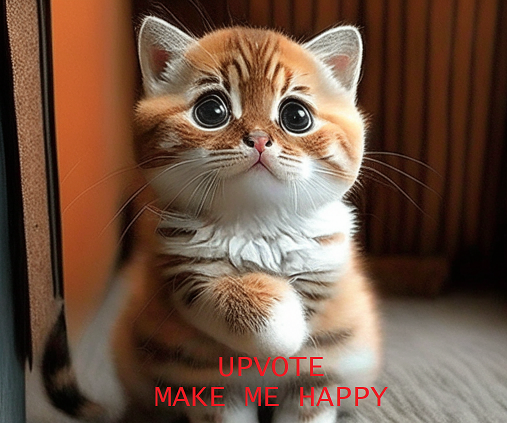